### LSTM (Bitmedi..)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt 
import matplotlib.patches as mpatches
from keras.layers.core import Dense,Activation,Dropout,Flatten,Reshape
from keras.layers import LSTM
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler


ModuleNotFoundError: No module named 'keras'

In [2]:
lstm_df = df[["Bugünkü Vaka Sayısı", "Tarih"]]
lstm_df

NameError: name 'df' is not defined

In [285]:
lstm_df.index = lstm_df["Tarih"]
lstm_df.index = pd.DatetimeIndex(lstm_df.index)
lstm_df.drop(["Tarih"], axis=1, inplace=True)

D:\C\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [286]:
lstm_df

,Bugünkü Vaka Sayısı
Tarih,
2020-03-11,1
2020-03-12,0
2020-03-13,4
2020-03-14,1
2020-03-15,12
...,...
2021-04-19,55149
2021-04-20,61028
2021-04-21,61967


In [310]:
scaler = MinMaxScaler(feature_range=(0,1))
ts = scaler.fit_transform(lstm_df)

In [311]:
timestep=3
X=[]
Y=[]

data = ts

for i in range(len(data)-timestep):
    X.append(data[i:i+timestep])
    Y.append(data[i+timestep])

X = np.asanyarray(X)
Y = np.asanyarray(Y)

X = X.reshape((X.shape[0],X.shape[1],1))


k = 59
Xtrain = X[:k,:,:]
Ytrain = Y[:k]

Xtest = X[k:,:,:]
Ytest = Y[k:]

In [312]:
lstm_model = Sequential()
lstm_model.add(LSTM(64,batch_input_shape=(None,timestep,1),return_sequences=True))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(32, return_sequences=False))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(1))

lstm_model.compile(loss='mse',optimizer='rmsprop')
lstm_model.fit(Xtrain, Ytrain, batch_size=512, epochs=50)

Epoch 1/50
1/1 [==============================] - 4s 4s/step - loss: 0.0020
Epoch 2/50
1/1 [==============================] - 0s 12ms/step - loss: 6.1338e-04
Epoch 3/50
1/1 [==============================] - 0s 14ms/step - loss: 4.9151e-04
Epoch 4/50
1/1 [==============================] - 0s 12ms/step - loss: 4.4878e-04
Epoch 5/50
1/1 [==============================] - 0s 18ms/step - loss: 4.4691e-04
Epoch 6/50
1/1 [==============================] - 0s 18ms/step - loss: 4.2435e-04
Epoch 7/50
1/1 [==============================] - 0s 11ms/step - loss: 4.5887e-04
Epoch 8/50
1/1 [==============================] - 0s 19ms/step - loss: 4.0805e-04
Epoch 9/50
1/1 [==============================] - 0s 15ms/step - loss: 4.1293e-04
Epoch 10/50
1/1 [==============================] - 0s 21ms/step - loss: 3.8001e-04
Epoch 11/50
1/1 [==============================] - 0s 15ms/step - loss: 3.5341e-04
Epoch 12/50
1/1 [==============================] - 0s 15ms/step - loss: 3.4036e-04
Epoch 13/50
1/1 [==

In [313]:
Ypred = lstm_model.predict(X)

Ypred = scaler.inverse_transform(Ypred)
Ypred = Ypred[:,0]

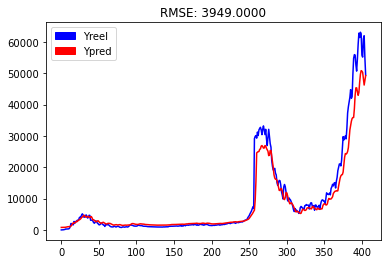

In [314]:
Yreel = lstm_df[timestep:].values

plt.plot(Yreel,label='Yreel',color='blue')
plt.plot(Ypred,label='Ypred',color='red')

blue_patch = mpatches.Patch(color='blue', label='Yreel')
red_patch = mpatches.Patch(color='red', label='Ypred')
plt.legend(handles = [blue_patch,red_patch])
plt.title('RMSE: %.4f'% np.sqrt(sum((Ypred.reshape(-1,1)-Yreel.reshape(-1,1))**2)/len(Yreel)).astype(int))
plt.show()

### PROPHET (FACEBOOK)

In [411]:
#!pip install pystan==2.19.1.1
#!conda install -c conda-forge prophet -y
#!pip install prophet

In [107]:
from prophet import Prophet

ModuleNotFoundError: No module named 'prophet'

In [401]:
prophet_df = df[["Tarih", "Bugünkü Vaka Sayısı"]]
prophet_df

,Tarih,Bugünkü Vaka Sayısı
0,2020-03-11,1
1,2020-03-12,0
2,2020-03-13,4
3,2020-03-14,1
4,2020-03-15,12
...,...,...
404,2021-04-19,55149
405,2021-04-20,61028
406,2021-04-21,61967
407,2021-04-22,54791


In [ ]:
m = Prophet(interval_width=0.95)
m.fit(confirmed)
future = m.make_future_dataframe(periods=7)
future_confirmed = future.copy() # for non-baseline predictions later on
future.tail()

In [411]:
#!pip install pystan==2.19.1.1
#!conda install -c conda-forge prophet -y
#!pip install prophet

In [23]:
from prophet import Prophet

In [94]:
prophet_df = df[["Tarih", "Bugünkü Vaka Sayısı"]]
prophet_df.columns =["ds", "y"]
prophet_df

,ds,y
0,2020-03-11,1
1,2020-03-12,0
2,2020-03-13,4
3,2020-03-14,1
4,2020-03-15,12
...,...,...
404,2021-04-19,55149
405,2021-04-20,61028
406,2021-04-21,61967
407,2021-04-22,54791


In [95]:
m = Prophet(interval_width=0.95)
m.fit(prophet_df)
future = m.make_future_dataframe(periods=7)
future_confirmed = future.copy() # for non-baseline predictions later on
future

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
0,2020-03-11
1,2020-03-12
2,2020-03-13
3,2020-03-14
4,2020-03-15
...,...
411,2021-04-26
412,2021-04-27
413,2021-04-28
414,2021-04-29


In [96]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
forecast=forecast.join(prophet_df['y'])

In [63]:
fr_df=forecast[['ds','yhat', 'y']]

In [64]:
fr_df.index = fr_df["ds"]
fr_df.index = pd.DatetimeIndex(fr_df.index)
fr_df.drop(["ds"], axis=1, inplace=True)
fr_df

C:\Users\Laptop\anaconda3\envs\qkitchen\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,yhat,y
ds,,
2020-03-11,969.325563,1.0
2020-03-12,1009.179700,0.0
2020-03-13,902.105445,4.0
2020-03-14,436.197546,1.0
2020-03-15,-205.234763,12.0
...,...,...
2021-11-09,106746.557182,NaN
2021-11-10,107217.750841,NaN
2021-11-11,107573.511795,NaN


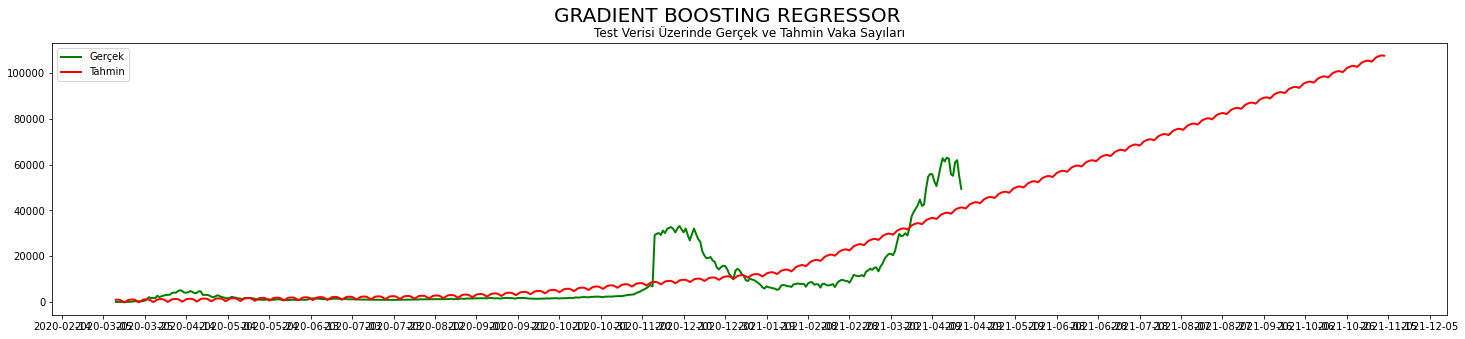

In [65]:
fig, ax = plt.subplots(figsize=(25,5))
plt.suptitle('GRADIENT BOOSTING REGRESSOR', fontsize = 20)
plt.title("Test Verisi Üzerinde Gerçek ve Tahmin Vaka Sayıları")
ax.xaxis.set_major_locator(dates.DayLocator(interval = 20))
date_form = DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(date_form)
plt.xticks(rotation = 50)
ax.plot(fr_df['y'],lw=2,color="#008000")
ax.plot(fr_df['yhat'],lw=2,color="#FF0000")
ax.legend(['Gerçek','Tahmin'])

In [91]:
from prophet.diagnostics import cross_validation
forecast = cross_validation(m, initial='10 days', period='10 days', horizon = '10 days')

INFO:prophet:Making 39 forecasts with cutoffs between 2020-03-29 00:00:00 and 2021-04-13 00:00:00


INFO:prophet:n_changepoints greater than number of observations. Using 14.
INFO:prophet:n_changepoints greater than number of observations. Using 22.


KeyboardInterrupt: 

In [ ]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(forecast)
df_p


In [90]:
df_p['rmse'].mean()

21885.02080171438

In [116]:
m = Prophet(interval_width=1)
m.fit(prophet_df)
future = m.make_future_dataframe(periods=7)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [117]:
forecast = m.predict(future)

In [118]:
se = np.square(forecast.loc[:, 'yhat'] - df['Bugünkü Vaka Sayısı'])
mse = np.mean(se)
rmse = np.sqrt(mse)

In [119]:
rmse

8106.752240226556

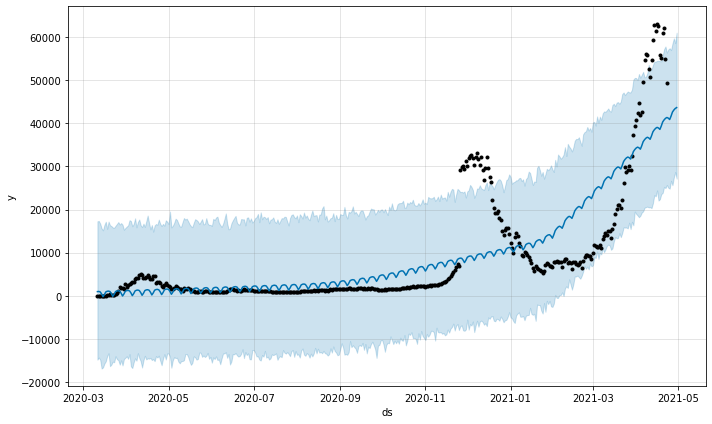

In [46]:
fig1 = m.plot(forecast)


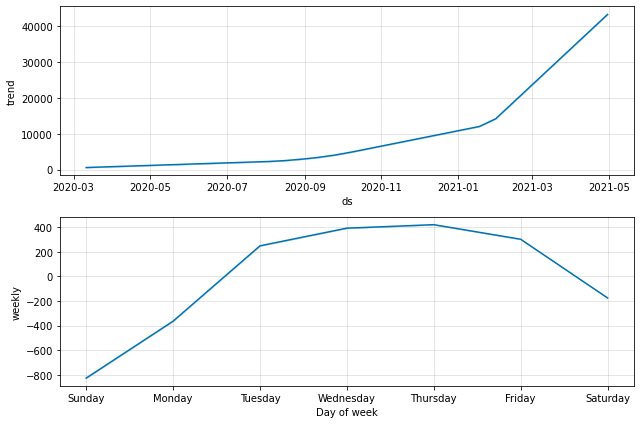

In [47]:
ig2 = m.plot_components(forecast)
